In [5]:
import fastbook
fastbook.setup_book()

In [6]:
from utils import *
from fastai.vision.widgets import *
from fastai.vision.widgets import Path

In [9]:
path = Path.cwd()/'datasets/bears'

In [10]:
path.ls()

(#4) [Path('/home/fastai-2020-lalkrishna/My-files/datasets/bears/.ipynb_checkpoints'),Path('/home/fastai-2020-lalkrishna/My-files/datasets/bears/black'),Path('/home/fastai-2020-lalkrishna/My-files/datasets/bears/grizzly'),Path('/home/fastai-2020-lalkrishna/My-files/datasets/bears/teddys')]

In [11]:
fns = get_image_files(path)

In [12]:
fns[2]

Path('/home/fastai-2020-lalkrishna/My-files/datasets/bears/black/00000016.jpg')

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
#to remove failed images, failed.map(Path.unlink)

In [15]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = .2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [16]:
dls = bears.dataloaders(path)

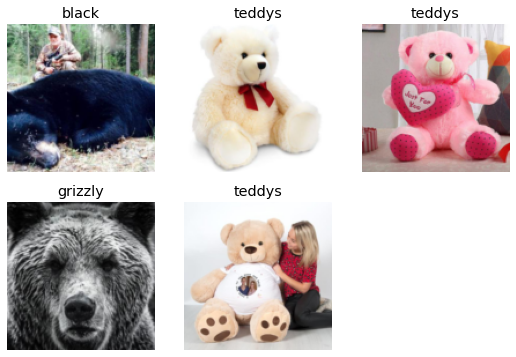

In [17]:
dls.valid.show_batch(max_n=5, nrows=2)

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,1.486706,0.164988,0.038462,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.311379,0.115286,0.038462,00:03
1,0.272756,0.097354,0.038462,00:03
2,0.224558,0.091775,0.038462,00:03
3,0.183963,0.095370,0.038462,00:03
4,0.158484,0.095292,0.038462,00:03
5,0.130583,0.098999,0.038462,00:03
6,0.114060,0.100977,0.038462,00:03
7,0.098810,0.107065,0.028846,00:03
8,0.084631,0.109140,0.028846,00:03
9,0.072721,0.108950,0.028846,00:03


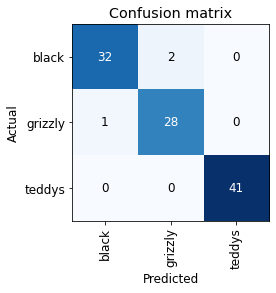

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

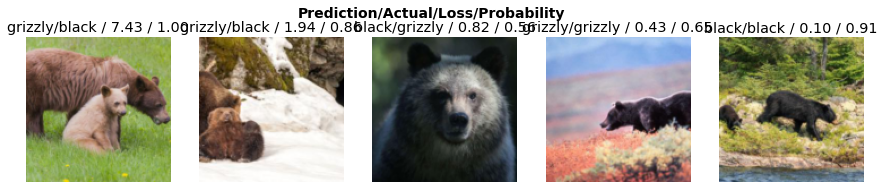

In [20]:
interp.plot_top_losses(5, nrows=1)

In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [22]:
def verify():
    img = PILImage.create(btn_upload.data[0])
    img.show()
    bear_type, _, prob = learn.predict(img)
    print(f"its a {bear_type} bear")

its a grizzly bear


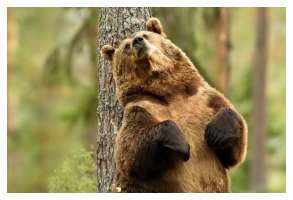

In [19]:
verify()